 # Selenium을 이용한 이미지 크롤링
- 유투브 영상을 이미지로 크롤링
- 특정 영역(Element)을 자르기
     - pillow : python을 이용해서 이미지를 전처리해주는 대표적인 패키지
     - conda install -c anaconda pillow
     - pip install pillow
- 유투브 영상 데이터를 다운로드
- fake_useragent 사용법 (셀레니움에서도 fake_useragent를 사용 가능함)
- headless 설정
    - 브라우져를 화면에 띄우지 않고 RAM영역에만 띄어서 사용하는 방법
    - 서버에서 selenium을 이용해서 크롤링할때 사용
    - 왜냐하면 서버에는 CLI(command line interface)밖에 없어서 브라우저 띄울 수 없음

In [2]:
import requests
import time
import pandas as pd
from selenium import webdriver
from PIL import Image as pil

## 이미지 스크린샷

In [3]:
!mkdir datas

In [6]:
url = "https://www.youtube.com/watch?v=b90Ax-IDAI4&t=100s" # t=100s = 100초부터
driver = webdriver.Chrome()
driver.get(url)

In [7]:
# 버튼을 눌러야 재생이 되니까

try:
    driver.find_element_by_css_selector(".ytp-large-play-button.ytp-button").click()
except:
    pass

In [8]:
# driver가 가지고 있는 save_screenshot 함수 이용해서
driver.save_screenshot("datas/screenshot.png") #datas에 screenshot.png로 저장
driver.quit()

In [9]:
!ls datas

screenshot.png


(2400, 1126)


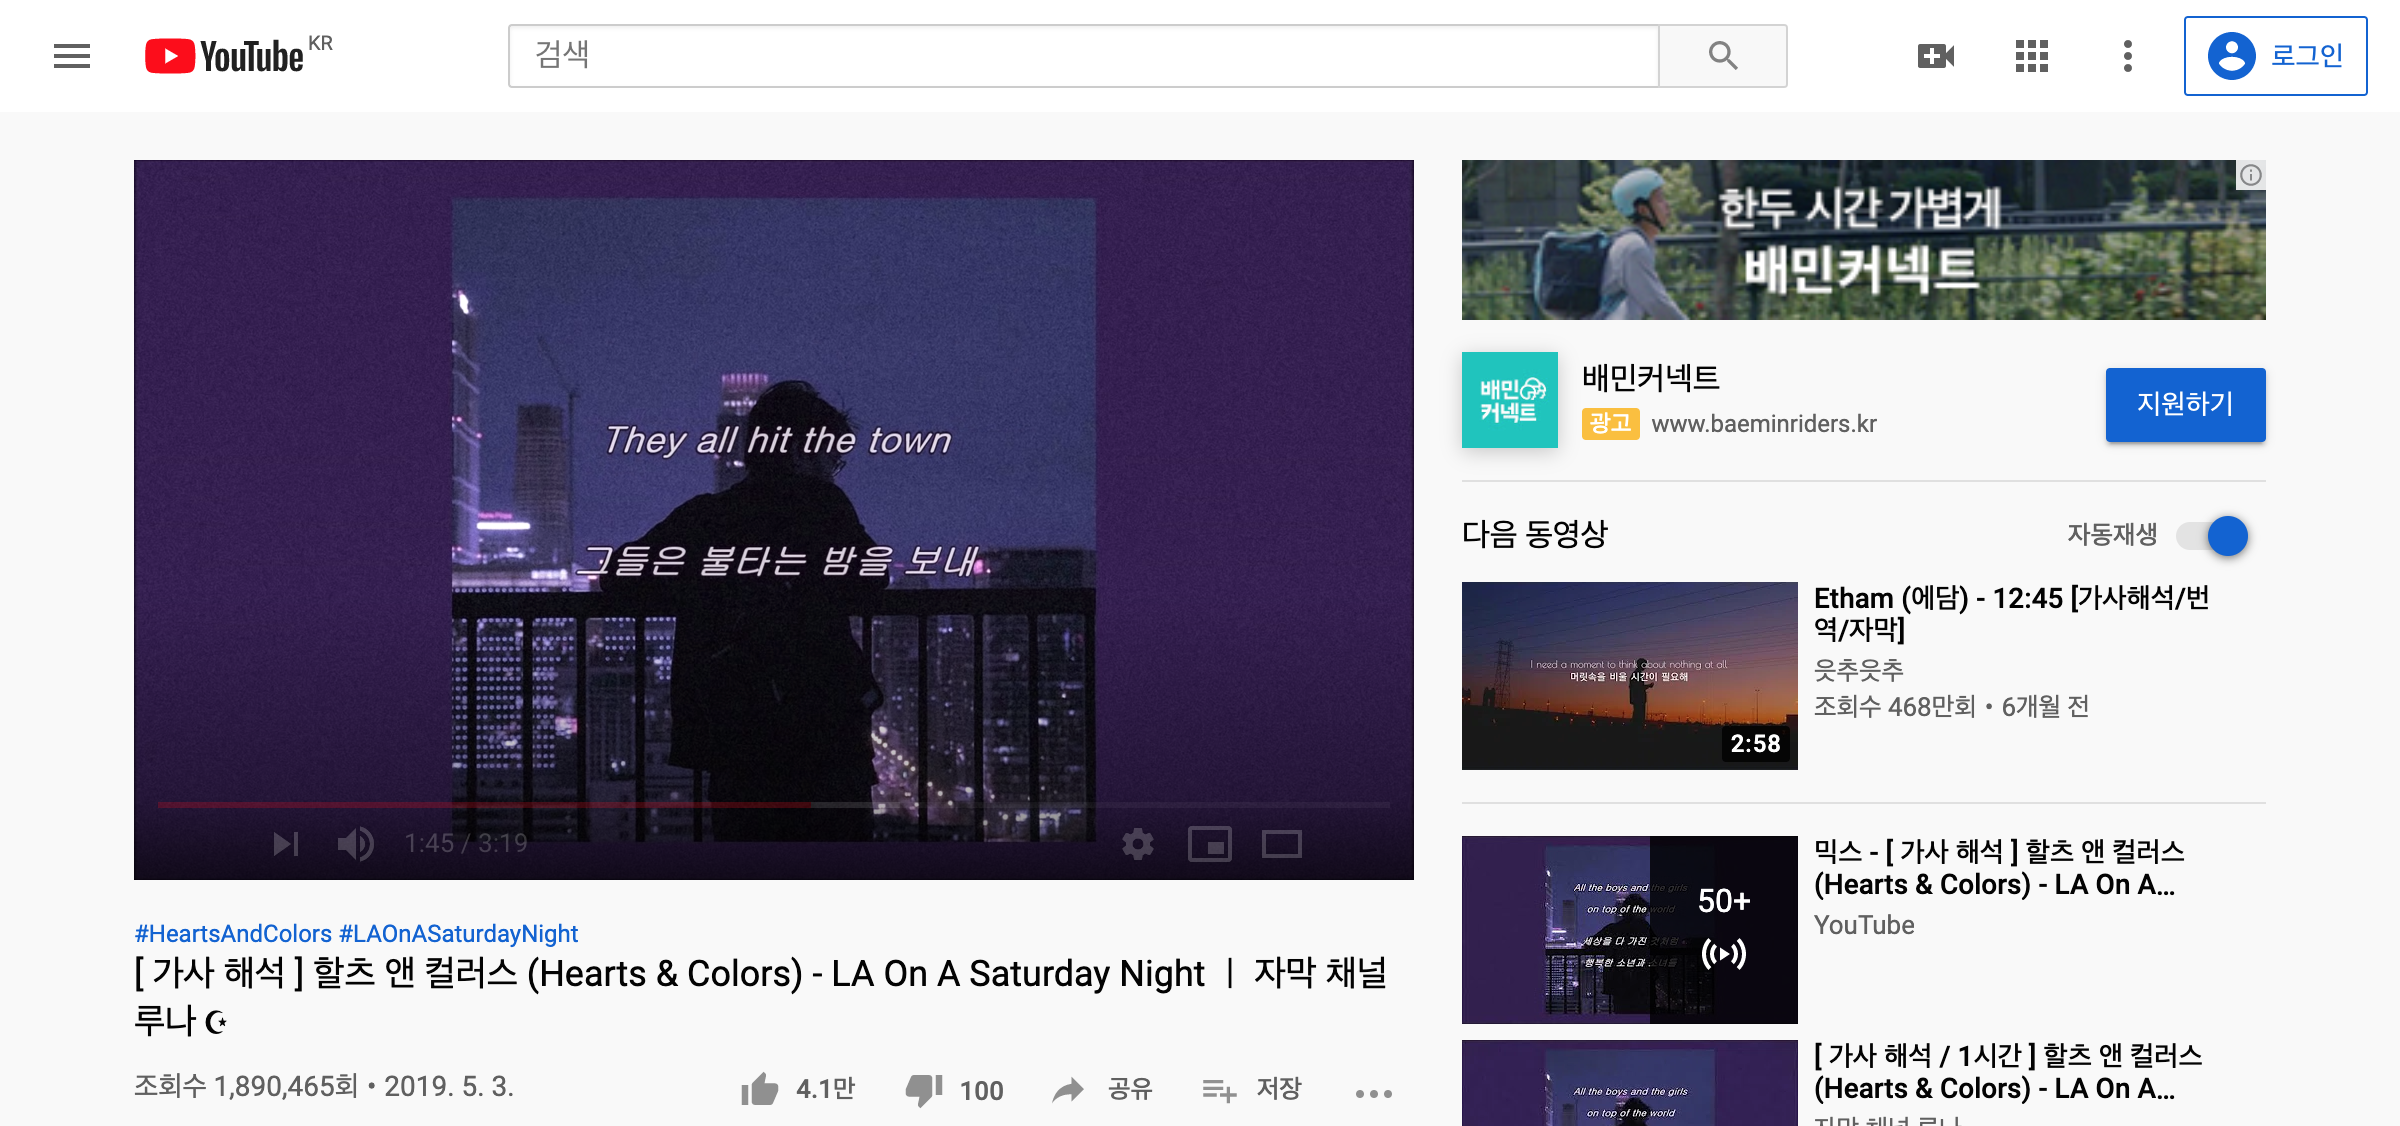

In [10]:
# 이미지 출력해보기
pil_img = pil.open("datas/screenshot.png")
print(pil_img.size)
pil_img

## 특정 영역의 엘리먼트 좌표값 구하기

In [11]:
driver = webdriver.Chrome()
driver.get(url)

In [12]:
element = driver.find_element_by_css_selector("#movie_player") # 영상영역 선택
location = element.location # x,y는 왼쪽 위 꼭지점 위치를 나타냄
size = element.size
print(location, size)
driver.quit()

{'x': 67, 'y': 80} {'height': 360, 'width': 640}


In [20]:
# area 변경 : 해상도에 따라서 비율이 달라지기 때문에 비율을 맞춰 줘야 합니다.
# 보통 레티나 디스플레이 쓴다면 *2 해줘야 맞게 나옴
left = location["x"] *2
top = location["y"] *2
right = left + size["width"] *2
bottom = top + size["height"] *2
area = (left, top, right, bottom)  # 사각형 선을 지정해준다고 생각하면 편함
area

(134, 160, 1414, 880)

## 이미지를 pillow로 잘라주기

In [21]:
pil_img.size

(2400, 1126)

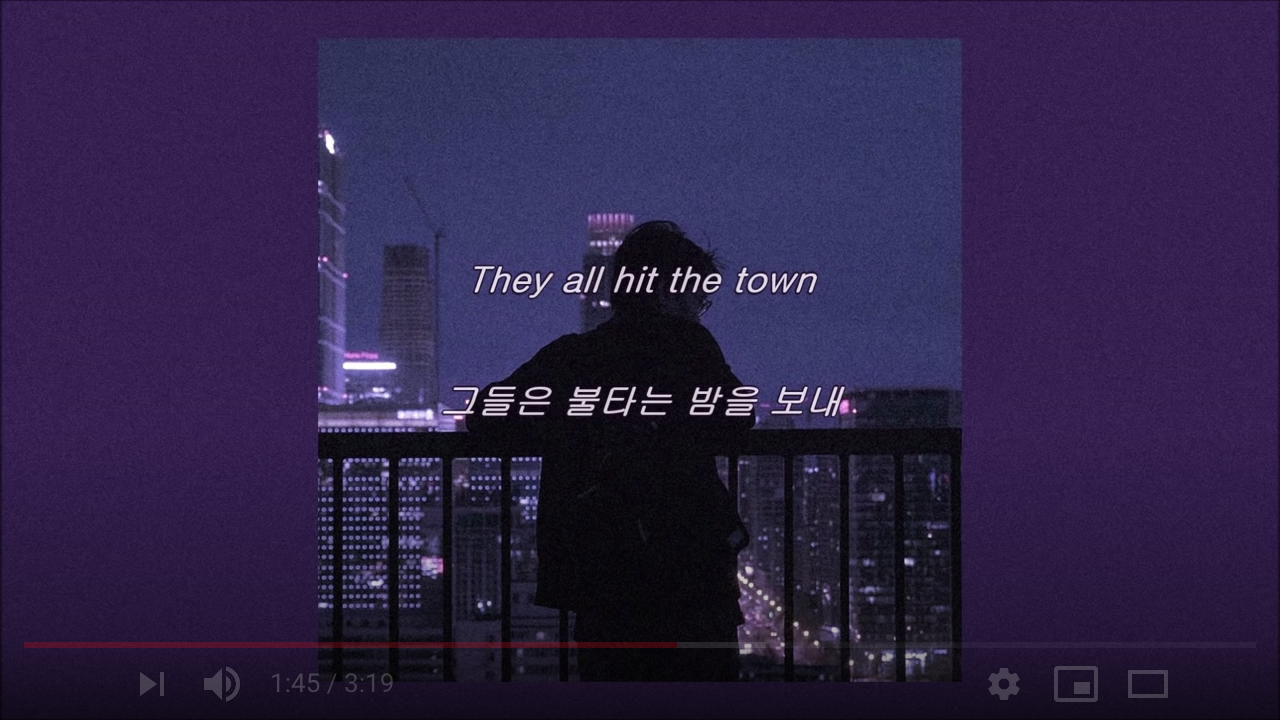

In [22]:
pil_element_img = pil_img.crop(area)
pil_element_img

In [23]:
# 이미지 저장
pil_element_img.save("datas/screenshot_element.png")

In [24]:
%ls datas

screenshot.png          screenshot_element.png


## 썸네일 만들기 
- 원본 이미지를 다양한 사이즈로 축소하는 방법

In [25]:
pil_element_img.size

(1280, 720)

(284, 160)


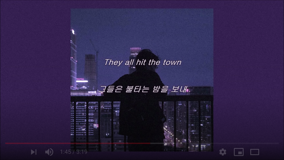

In [26]:
# 트래픽을 줄이기 위해서 작게 보이는건 데이터도 적게 내보냄 = 썸네일
pil_element_img.thumbnail((320, 160))
print(pil_element_img.size)
pil_element_img

## fake useragent

In [39]:
from fake_useragent import UserAgent

In [44]:
# 원래 내 크롬 드라이버의 Agent 확인
driver = webdriver.Chrome()
agent = driver.execute_script("return navigator.userAgent;")
driver.quit()
print(agent)

Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/78.0.3904.97 Safari/537.36


In [72]:
#fake user agent
UserAgent().chrome

'Mozilla/5.0 (Windows NT 5.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/35.0.2309.372 Safari/537.36'

In [74]:
# user agent 설정
options = webdriver.ChromeOptions()
options.add_argument("user-agent={}".format(UserAgent().chrome))

driver = webdriver.Chrome(options=options)
agent = driver.execute_script("return navigator.userAgent;")
driver.quit()
print(agent)

Mozilla/5.0 (Windows NT 5.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/31.0.1650.16 Safari/537.36


## Headless
- 브라우져를 화면에 띄우지 않고 메모리상에서만 실행하는 방법
- 크롬 버전 60 이상에서만 사용이 가능
- window 화면이 지원되지 않는 환경에서 사용
- 서버같이 window 화면이 지원되지 않는 곳에서 headless를 사용하지 않으면 error 뜸

In [27]:
options = webdriver.ChromeOptions()
options.add_argument("headless")

driver = webdriver.Chrome(options=options)
driver.get("https://fastcampus.co.kr/")
print(driver.title)
driver.quit()

커리어 성장을 위한 최고의 실무교육 아카데미 | 패스트캠퍼스


## 영상 파일 다운로드
- www. -> ss 로 변경하면 다운로드 받을수 있는 사이트에 접속

In [32]:
def download(title, link):
    response = requests.get(link, stream=True)
    save_path, size = "datas/{}".format(title), 0
    with open(save_path, "wb") as f:
        for chunk in response.iter_content(chunk_size=1024):
            if chunk:
                size += 1024
                f.write(chunk)
    return size

In [33]:
url = "https://www.youtube.com/watch?v=b90Ax-IDAI4"

In [34]:
link = "https://ko.savefrom.net/7/#url=http://youtube.com/watch?v=b90Ax-IDAI4&utm_source=youtube.com&utm_medium=short_domains&utm_campaign=ssyoutube.com&a_ts=1598367996.890"

In [36]:
title = "LA on saterday night.mp3" #mp4파일로 저장
size = download(title, link)
print("{} Mb".format(round(size/1024/1024,2)))

0.02 Mb
